## Packages

In [1]:
!pip install bs4

In [42]:
import yfinance as yf
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Scrape Data

In [3]:
TSLA=yf.Ticker("TSLA")

In [4]:
tesla_data=TSLA.history(period="3y")

In [5]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-08-20,58.340000,61.700001,57.639999,61.688000,87011500,0,0.0
1,2018-08-21,62.122002,64.958000,61.799999,64.379997,65861000,0,0.0
2,2018-08-22,64.174004,64.776001,62.933998,64.328003,29730000,0,0.0
3,2018-08-23,63.827999,65.463997,63.619999,64.019997,25736500,0,0.0
4,2018-08-24,64.139999,64.769997,63.880001,64.564003,18013000,0,0.0


In [12]:
tesla=tesla_data[['Date','Close']]
tesla.columns=['Date','TSLA']
tesla

,Date,TSLA
0,2018-08-20,61.688000
1,2018-08-21,64.379997
2,2018-08-22,64.328003
3,2018-08-23,64.019997
4,2018-08-24,64.564003
...,...,...
751,2021-08-13,717.169983
752,2021-08-16,686.169983
753,2021-08-17,665.710022
754,2021-08-18,688.989990


In [23]:
GME=yf.Ticker('GME')

In [26]:
gme_data=GME.history(period='3y')
gme_data.reset_index(inplace=True)

In [31]:
gme=gme_data['Close']
gme

0       14.566732
1       15.154916
2       15.605245
3       15.403056
4       15.210057
          ...    
751    162.520004
752    163.929993
753    163.550003
754    157.050003
755    152.899994
Name: Close, Length: 756, dtype: float64

In [39]:
dataall=tesla.join(gme)
dataall.rename(columns={'Close':'GME'},inplace=True)
dataall.set_index(['Date'],inplace=True)
dataall

,TSLA,GME
Date,,
2018-08-20,61.688000,14.566732
2018-08-21,64.379997,15.154916
2018-08-22,64.328003,15.605245
2018-08-23,64.019997,15.403056
2018-08-24,64.564003,15.210057
...,...,...
2021-08-13,717.169983,162.520004
2021-08-16,686.169983,163.929993
2021-08-17,665.710022,163.550003


## Feature Engineering - Normalized Price

In [40]:
normalized_price = (dataall/dataall.iloc[0])
normalized_price

,TSLA,GME
Date,,
2018-08-20,1.000000,1.000000
2018-08-21,1.043639,1.040379
2018-08-22,1.042796,1.071293
2018-08-23,1.037803,1.057413
2018-08-24,1.046622,1.044164
...,...,...
2021-08-13,11.625762,11.156929
2021-08-16,11.123233,11.253724
2021-08-17,10.791564,11.227638


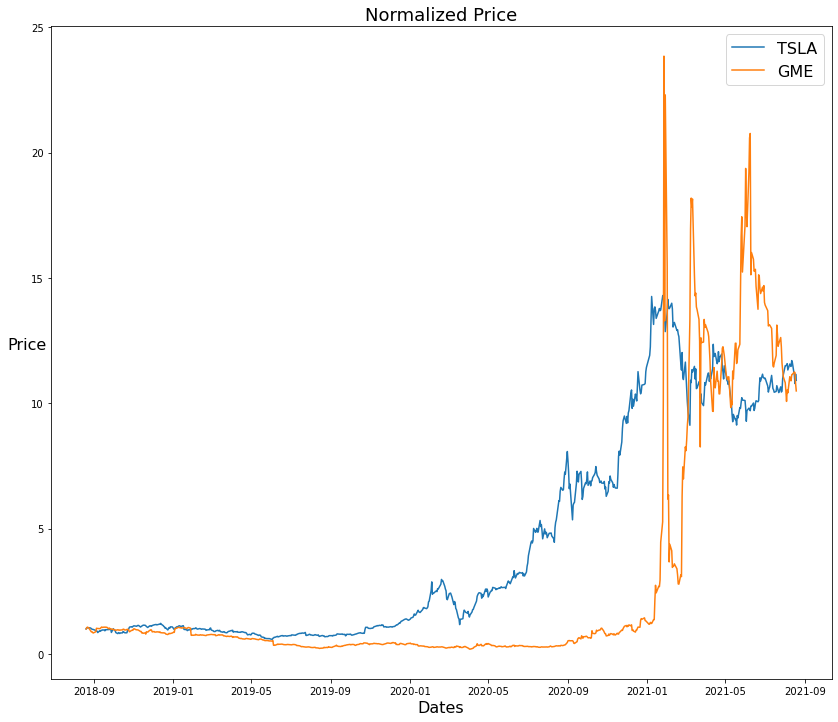

In [45]:
fig=plt.figure(figsize=(14,12))
plt.plot(normalized_price)
title_obj=plt.title("Normalized Price", fontsize=18)
xlabel_obj = plt.xlabel("Dates",fontsize=16)
ylabel_obj = plt.ylabel("Price", rotation=0, fontsize=16)
plt.legend(['TSLA','GME'],fontsize=16,loc="best")
plt.show()

## Feature Engineering - Return

In [46]:
returns = dataall.pct_change(1)
returns.dropna(inplace=True)
returns

,TSLA,GME
Date,,
2018-08-21,0.043639,0.040379
2018-08-22,-0.000808,0.029715
2018-08-23,-0.004788,-0.012956
2018-08-24,0.008497,-0.012530
2018-08-27,-0.010997,-0.111178
...,...,...
2021-08-13,-0.007034,0.001047
2021-08-16,-0.043225,0.008676
2021-08-17,-0.029818,-0.002318


In [47]:
np.round(returns.corr(),2)

,TSLA,GME
TSLA,1.00,0.09
GME,0.09,1.00


In [48]:
returns+1

,TSLA,GME
Date,,
2018-08-21,1.043639,1.040379
2018-08-22,0.999192,1.029715
2018-08-23,0.995212,0.987044
2018-08-24,1.008497,0.987470
2018-08-27,0.989003,0.888822
...,...,...
2021-08-13,0.992966,1.001047
2021-08-16,0.956775,1.008676
2021-08-17,0.970182,0.997682


## Additional Financial Metrics 

In [50]:
ONEYEARDAYS=252

In [51]:
stats = pd.DataFrame()
stats['Annualized Returns(%)']    = np.round(returns.mean() * ONEYEARDAYS *100,2)
stats['Annualized Volatility(%)'] = np.round(returns.std() * np.sqrt(ONEYEARDAYS)*100,2)
stats['Sharpe Ratio'] = np.round(stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)'],2)
stats.style.bar(color=['red','green'], align='zero')

,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
TSLA,103.450000,68.800000,1.500000
GME,205.190000,174.240000,1.180000


Text(0.5, 1.0, 'GME return statistics')

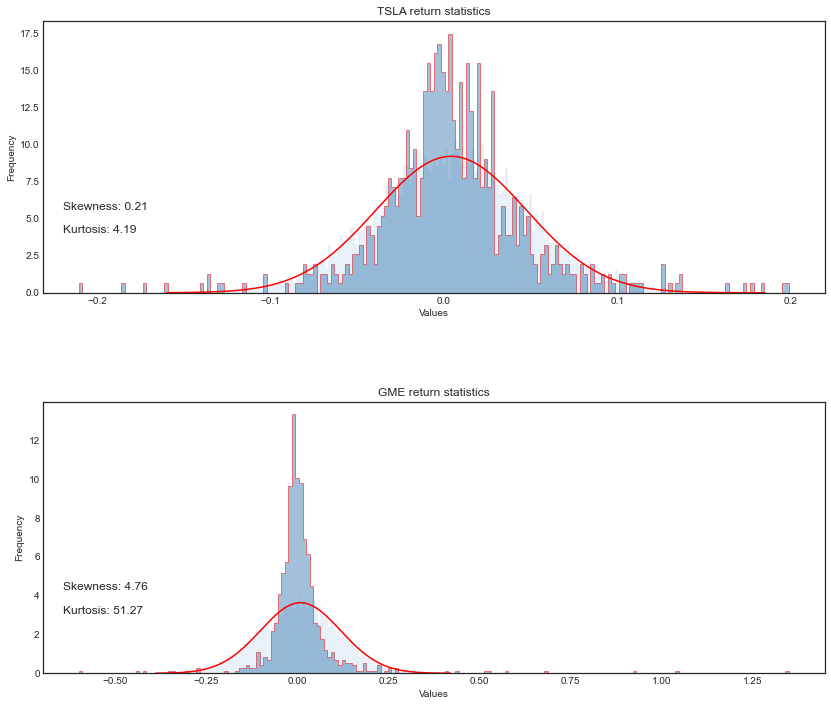

In [54]:
binsnumber = 200
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(14,12))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots

plt.subplot(211)
ax = plt.gca()
ax.hist(returns['TSLA'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns['TSLA'].std(),returns['TSLA'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns['TSLA'].skew(),2),
                                                  round(returns['TSLA'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('TSLA return statistics')


#####################
plt.subplot(212)
ax = plt.gca()

ax.hist(returns['GME'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns['GME'].std(),returns['GME'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns['GME'].skew(),2),
                                                  round(returns['GME'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('GME return statistics')

## Additional Analysis: Revenue

In [55]:
url='https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ'
html_data=requests.get(url).text

In [56]:
soup=BeautifulSoup(html_data,'html5lib')

In [58]:
tesla_revenue=pd.DataFrame(columns=['Date','Revenue'])

tables=soup.find_all('table')

for i, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):
        index=i
for row in tables[index].tbody.find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text.replace('$','').replace(',','')
    tesla_revenue=tesla_revenue.append({'Date':date,'Revenue':revenue},ignore_index=True)
tesla_revenue.set_index(['Date'],inplace=True)

In [74]:
tesla_revenue

,Revenue
Date,
2021-06-30,11958
2021-03-31,10389
2020-12-31,10744
2020-09-30,8771
2020-06-30,6036
2020-03-31,5985
2019-12-31,7384
2019-09-30,6303
2019-06-30,6350
